In [8]:
!pip install seaborn
!pip install nltk
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install IPython
!pip install math
!pip install pprint
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import csv
import os

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
df = pd.read_csv("news.csv")

In [10]:
df

,Title,URL
0,"Trudeau announces $62.5 million for seafood, f...",https://news.google.com/articles/CAIiEOlxnklWR...
1,Coronavirus: Disinfectant riff the latest of T...,https://news.google.com/articles/CAIiEJ1tWZV1u...
2,Coronavirus: What's happening in Canada and ar...,https://news.google.com/articles/CBMiPGh0dHBzO...
3,Is it safe to go running during the coronaviru...,https://news.google.com/articles/CAIiEBFqvVALO...
4,Coronavirus: Brazil emerging as world hot spot...,https://news.google.com/articles/CAIiEHqq55m3D...
...,...,...
95,Disinfectant Against Coronavirus: How to Make ...,https://news.google.com/articles/CAIiEKc90rfvP...
96,Is the curve flattening? Expert says coronavir...,https://news.google.com/articles/CAIiEP5JBHOLe...
97,'We knew that the foreign workers would be a s...,https://news.google.com/articles/CAIiEGeTamD-M...
98,"Virginia sees 772 new coronavirus cases, now r...",https://news.google.com/articles/CAIiECzCJ22j9...


In [11]:
titles =  df['Title'].tolist()

In [12]:
print(type(titles))
titles

<class 'list'>


['Trudeau announces $62.5 million for seafood, fish processors during coronavirus pandemic',
 'Coronavirus: Disinfectant riff the latest of Trump’s many clashes with science',
 "Coronavirus: What's happening in Canada and around the world on Saturday",
 'Is it safe to go running during the coronavirus pandemic?',
 'Coronavirus: Brazil emerging as world hot spot for virus',
 'Trump’s role in coronavirus briefings may be reduced after disinfectant remarks: sources',
 'The fight to save patients from the coronavirus at Surrey Memorial Hospital',
 'Coronavirus: Canada adds over 1,700 new cases, 161 new deaths',
 'Coronavirus: Asian-Americans turn to guns, GoPros to deter attacks',
 'What you need to know about coronavirus on Saturday, April 25',
 'Coronavirus: Plan to reopen Ontario economy will be revealed ‘early next week’',
 'Coronavirus: 2 more confirmed cases in Interior Health region, total now 158',
 'Conrad Black: A path out of the coronavirus lockdown',
 'Emotional burden of coron

#### NLTK’s built-in Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.downloader.download('vader_lexicon')
sia = SIA()
results = []

for headline in titles:
    pol_score = sia.polarity_scores(headline)
#     print(pol_score)
    pol_score['headline'] = headline
    results.append(pol_score)
pprint(results[:2], width=70)

[{'compound': 0.0,
  'headline': 'Trudeau announces $62.5 million for seafood, fish '
              'processors during coronavirus pandemic',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Coronavirus: Disinfectant riff the latest of Trump’s '
              'many clashes with science',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sahil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Generating labels for each headline.

In [14]:
sentiments = pd.DataFrame.from_records(results)

In [15]:
sentiments.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,"Trudeau announces $62.5 million for seafood, f..."
1,0.0,1.000,0.000,0.0000,Coronavirus: Disinfectant riff the latest of T...
2,0.0,1.000,0.000,0.0000,Coronavirus: What's happening in Canada and ar...
3,0.0,0.756,0.244,0.4404,Is it safe to go running during the coronaviru...
4,0.0,1.000,0.000,0.0000,Coronavirus: Brazil emerging as world hot spot...


In [16]:
sentiments['label'] = 0
sentiments.loc[sentiments['compound'] > 0.2, 'label'] = 1
sentiments.loc[sentiments['compound'] < -0.2, 'label'] = -1
sentiments.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,"Trudeau announces $62.5 million for seafood, f...",0
1,0.0,1.000,0.000,0.0000,Coronavirus: Disinfectant riff the latest of T...,0
2,0.0,1.000,0.000,0.0000,Coronavirus: What's happening in Canada and ar...,0
3,0.0,0.756,0.244,0.4404,Is it safe to go running during the coronaviru...,1
4,0.0,1.000,0.000,0.0000,Coronavirus: Brazil emerging as world hot spot...,0


In [17]:
df2 = sentiments[['headline', 'label']]
df2.to_csv('new_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [18]:
df2

,headline,label
0,"Trudeau announces $62.5 million for seafood, f...",0
1,Coronavirus: Disinfectant riff the latest of T...,0
2,Coronavirus: What's happening in Canada and ar...,0
3,Is it safe to go running during the coronaviru...,1
4,Coronavirus: Brazil emerging as world hot spot...,0
...,...,...
95,Disinfectant Against Coronavirus: How to Make ...,0
96,Is the curve flattening? Expert says coronavir...,-1
97,'We knew that the foreign workers would be a s...,-1
98,"Virginia sees 772 new coronavirus cases, now r...",0


In [19]:
print("Positive headlines:\n")
pprint(list(df2[df2['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df2[df2['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Is it safe to go running during the coronavirus pandemic?',
 "Coronavirus: Belarus orphanage seeks help amid 'critical' outbreak",
 'Mandatory Face Masks And More: Canadian Airlines Introduce New Coronavirus Travel Safety Measures',
 'Running is enjoying a boom because of the coronavirus pandemic',
 'Coronavirus antibody testing a big deal? What to know about the promising serology tests']

Negative headlines:

['Coronavirus: Asian-Americans turn to guns, GoPros to deter attacks',
 'Somali civilian shot dead by police amid coronavirus restrictions',
 "'They are trying to steal everything.' US coronavirus response hit by foreign hackers",
 'After her husband died from coronavirus, she found an emotional goodbye note on his phone',
 "Singapore's migrant workers are suffering the brunt of the country's coronavirus outbreak"]


In [20]:
print(df2.label.value_counts())

print(df2.label.value_counts(normalize=True) * 100)

 0    60
-1    26
 1    14
Name: label, dtype: int64
 0    60.0
-1    26.0
 1    14.0
Name: label, dtype: float64


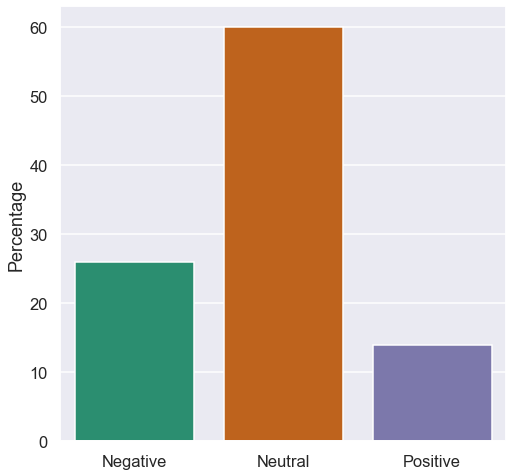

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Tokenizers and Stopwords 

In [22]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.downloader.download('punkt')

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))


['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


[nltk_data] Downloading package punkt to /Users/sahil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [24]:
from nltk.corpus import stopwords
nltk.downloader.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /Users/sahil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Word Distributions 

In [25]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens


In [26]:
# tokens = process_text(titles)

In [27]:
pos_lines = list(df2[df2.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('coronavirus', 14),
 ('pandemic', 4),
 ('running', 2),
 ('workers', 2),
 ('bill', 2),
 ('open', 2),
 ('data', 2),
 ('safe', 1),
 ('go', 1),
 ('belarus', 1),
 ('orphanage', 1),
 ('seeks', 1),
 ('help', 1),
 ('amid', 1),
 ('critical', 1),
 ('outbreak', 1),
 ('mandatory', 1),
 ('face', 1),
 ('masks', 1),
 ('canadian', 1)]

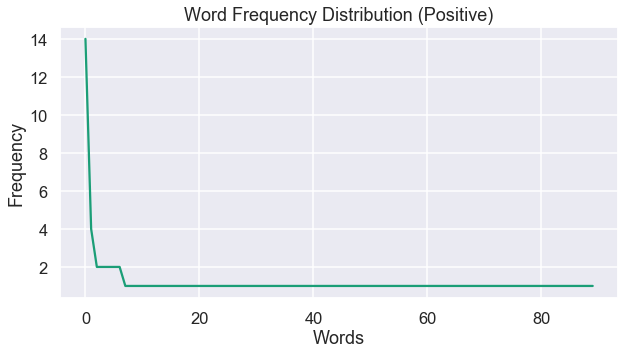

In [28]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

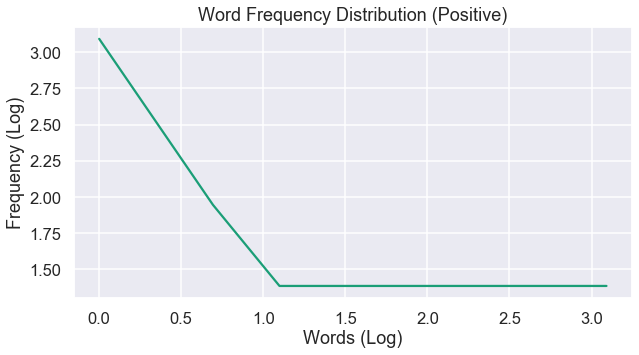

In [29]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [30]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('coronavirus', 25),
 ('us', 7),
 ('death', 4),
 ('response', 2),
 ('foreign', 2),
 ('died', 2),
 ('singapore', 2),
 ('workers', 2),
 ('researchers', 2),
 ('chloroquine', 2),
 ('study', 2),
 ('may', 2),
 ('asian', 1),
 ('americans', 1),
 ('turn', 1),
 ('guns', 1),
 ('gopros', 1),
 ('deter', 1),
 ('attacks', 1),
 ('somali', 1)]

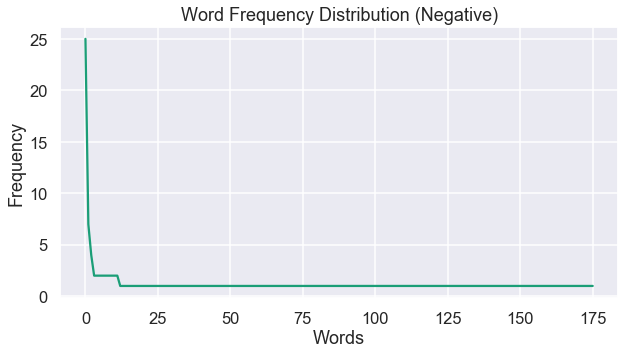

In [31]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

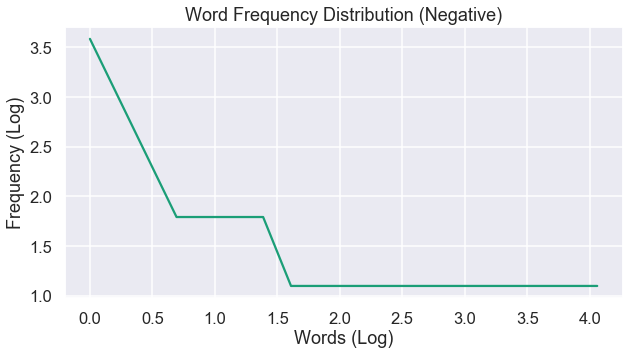

In [32]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

#### FUTURE SCOPE: 
WE CAN USE CONTENT OF THE NEWS FOR MORE ACCURATE RESUTS.